Simulated DR2 lensed QSO query final

In [1]:
import numpy as np
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
%matplotlib inline

In [2]:
mp.rcParams['figure.figsize'] = (12, 8)

In [3]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

In [5]:
from context import gaiapix
import gaiapix.gaiapix as hp

In [60]:
from context import lens
import lens.sie.random as sierd

assume that the 2 files have the same hp level 

In [7]:
def addGalactic(df):
    df['l'] = SkyCoord(df.ra.values,df.dec.values,unit=u.deg).galactic.l.wrap_at(180*u.degree)
    df['b'] = SkyCoord(df.ra.values,df.dec.values,unit=u.deg).galactic.b.deg

# QSO 

In [8]:
%time d = pd.read_csv("../data/DR2simALLwiseQSO.csv")

CPU times: user 2.62 s, sys: 168 ms, total: 2.79 s
Wall time: 2.79 s


set source id

In [11]:
hpX = hp.gaiapix(12)
d['source_id'] = hpX.angle2pixel(d.ra,d.dec)*hpX.s + d.index

In [12]:
d[:10]

,Unnamed: 0,WISEA,RAJ2000,DEJ2000,W1-W2,W2-W3,W1mag,gmag,z,f_z,...,dec_error,pmra_error,pmdec_error,pmra,pmdec,parallax_error,parallax,l,b,source_id
0,584548,b'J232728.74-425348.3',351.869774,-42.896768,1.35,2.97,15.53,NaN,NaN,b'',...,12.118580,1.391371,1.391371,-2.477970,-1.494264,0.722815,0.164474,344.690573,-66.795535,6535126442643030016
1,21930,b'J010935.70-294833.3',17.398767,-29.809275,1.19,3.32,16.14,NaN,NaN,b'',...,0.414252,0.422101,0.422101,0.947101,0.602717,0.225959,-0.030527,247.894254,-85.193370,5029799572864499713
2,1133935,b'J073542.69+085355.2',113.927892,8.898671,0.96,2.66,14.51,NaN,NaN,b'',...,1.086583,0.631719,0.631719,-0.380838,-0.387692,0.331812,0.393107,209.910143,13.847541,3149175849421373442
3,1300035,b'J014713.66+095413.8',26.806939,9.903858,1.25,3.08,14.56,NaN,NaN,b'',...,1.227608,0.661589,0.661589,1.348216,0.333858,0.346946,0.092814,144.886835,-50.574387,2572555393054015491
4,654,b'J020747.26-165131.8',31.946926,-16.858857,1.40,3.64,16.46,NaN,NaN,b'',...,0.570975,0.486893,0.486893,0.257635,-0.444747,0.258629,-0.174236,186.689107,-69.578698,5144581336899518468
5,581224,b'J225946.17-271444.1',344.942376,-27.245608,1.15,2.95,13.89,NaN,NaN,b'',...,2.229615,0.819623,0.819623,0.975244,0.297265,0.427309,0.460733,26.187454,-65.219119,6609821627637039109
6,865232,b'J141211.77+781358.5',213.049054,78.232924,1.54,3.35,16.96,NaN,NaN,b'',...,2.175952,0.812767,0.812767,1.372959,-0.490574,0.423812,-0.324897,117.802041,38.079012,1714932234579869702
7,1111251,b'J072308.90+772933.2',110.787114,77.492576,1.45,3.04,15.30,NaN,NaN,b'',...,4.096186,1.002693,1.002693,-1.639555,-1.082720,0.521088,-0.103797,137.011331,28.147674,1140018701295157255
8,82597,b'J041109.19-553804.1',62.788309,-55.634481,1.12,3.61,15.98,NaN,NaN,b'',...,3.202398,0.925787,0.925787,-0.716778,-0.377846,0.481599,0.577020,265.725528,-44.410122,4779454072438652936
9,496735,b'J124316.71-420508.3',190.819664,-42.085661,1.32,4.15,17.09,NaN,NaN,b'',...,1.343538,0.684196,0.684196,-0.281525,-1.502394,0.358411,0.229230,301.313099,20.760439,6145902796743901193


In [13]:
len(d)

393907

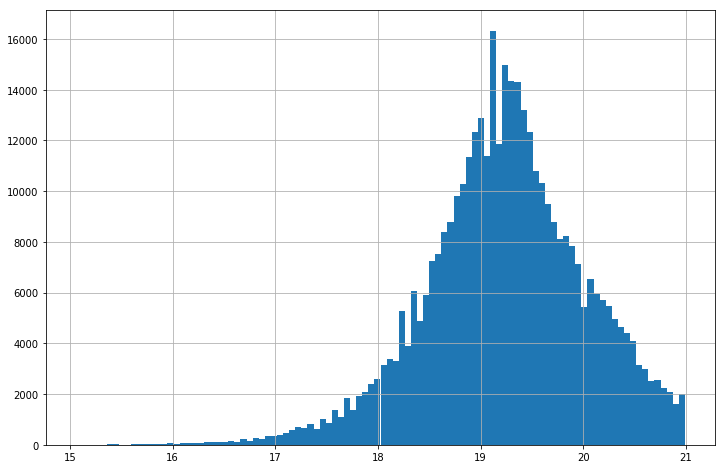

In [14]:
d.phot_g_mean_mag.hist(bins=100)

In [15]:
columns = ['ra','ra_error','dec','dec_error',
           'parallax','parallax_error',
           'pmra','pmra_error','pmdec','pmdec_error',
           'phot_g_mean_mag']

In [16]:
d['astrometric_pseudo_colour'] = np.random.normal(1.7,0.2,len(d))

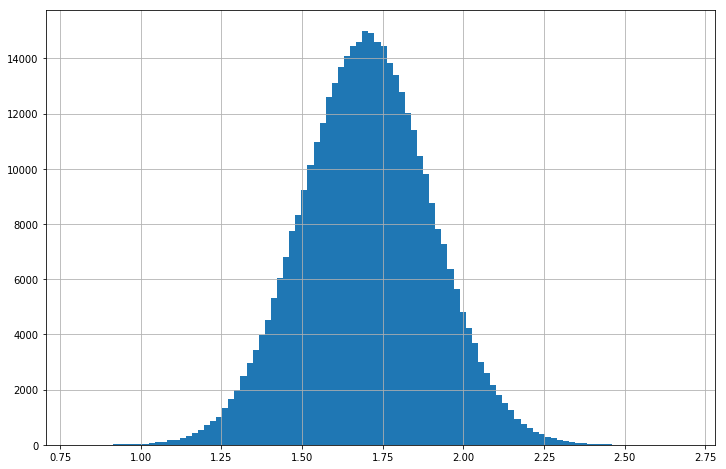

In [17]:
d.astrometric_pseudo_colour.hist(bins=100)

In [19]:
columns = ['ra','ra_error','dec','dec_error',
           'parallax','parallax_error',
           'pmra','pmra_error','pmdec','pmdec_error',
           'phot_g_mean_mag','source_id','astrometric_pseudo_colour']

In [20]:
d[columns][:10]

,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,source_id,astrometric_pseudo_colour
0,351.869774,12.118580,-42.896768,12.118580,0.164474,0.722815,-2.477970,1.391371,-1.494264,1.391371,20.2395,6535126442643030016,1.734305
1,17.398767,0.414252,-29.809275,0.414252,-0.030527,0.225959,0.947101,0.422101,0.602717,0.422101,18.2515,5029799572864499713,1.659944
2,113.927892,1.086583,8.898671,1.086583,0.393107,0.331812,-0.380838,0.631719,-0.387692,0.631719,18.9235,3149175849421373442,1.740412
3,26.806939,1.227608,9.903858,1.227608,0.092814,0.346946,1.348216,0.661589,0.333858,0.661589,19.0005,2572555393054015491,2.101133
4,31.946926,0.570975,-16.858857,0.570975,-0.174236,0.258629,0.257635,0.486893,-0.444747,0.486893,18.4895,5144581336899518468,1.405255
5,344.942376,2.229615,-27.245608,2.229615,0.460733,0.427309,0.975244,0.819623,0.297265,0.819623,19.3575,6609821627637039109,1.525341
6,213.049054,2.175952,78.232924,2.175952,-0.324897,0.423812,1.372959,0.812767,-0.490574,0.812767,19.3435,1714932234579869702,1.562940
7,110.787114,4.096186,77.492576,4.096186,-0.103797,0.521088,-1.639555,1.002693,-1.082720,1.002693,19.6935,1140018701295157255,2.202376
8,62.788309,3.202398,-55.634481,3.202398,0.577020,0.481599,-0.716778,0.925787,-0.377846,0.925787,19.5605,4779454072438652936,1.531068
9,190.819664,1.343538,-42.085661,1.343538,0.229230,0.358411,-0.281525,0.684196,-1.502394,0.684196,19.0565,6145902796743901193,1.455510


In [21]:
d['qsoid'] = d['source_id']
d['type'] = "QSO"

# STAR : the contaminant

In [22]:
%time m = pd.read_csv("../data/contaminantModel.csv")

CPU times: user 41.9 ms, sys: 8.29 ms, total: 50.2 ms
Wall time: 51.6 ms


assume that the contaminant model was comupted with hp level 6

In [23]:
level=6

some util functions

Text(0.5,1,'ALLwise DR2 expectation')

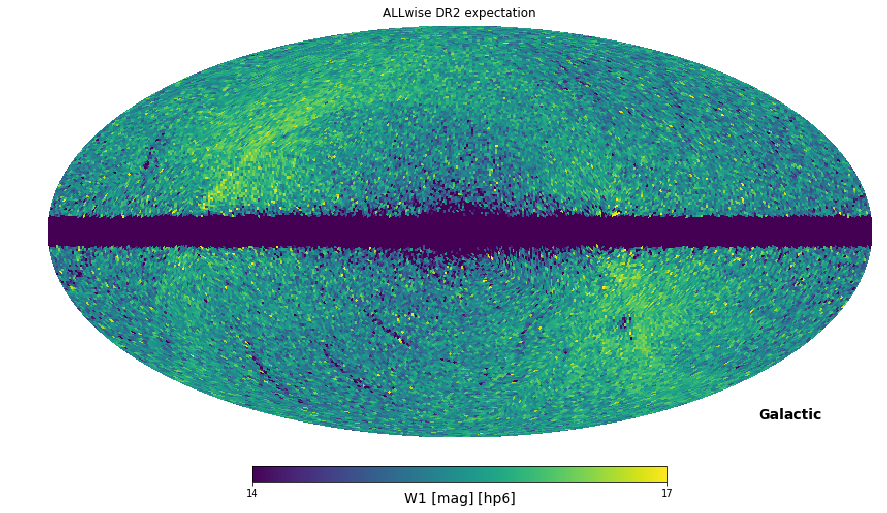

In [24]:
hpX = hp.gaiapix(level)
hpX.setHpValues(d,keyValue='W1mag')
f = plt.figure()
hpX.plot(f,vmin=14,vmax=17,cmap=mp.cm.viridis,coord='G',unit="W1 [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

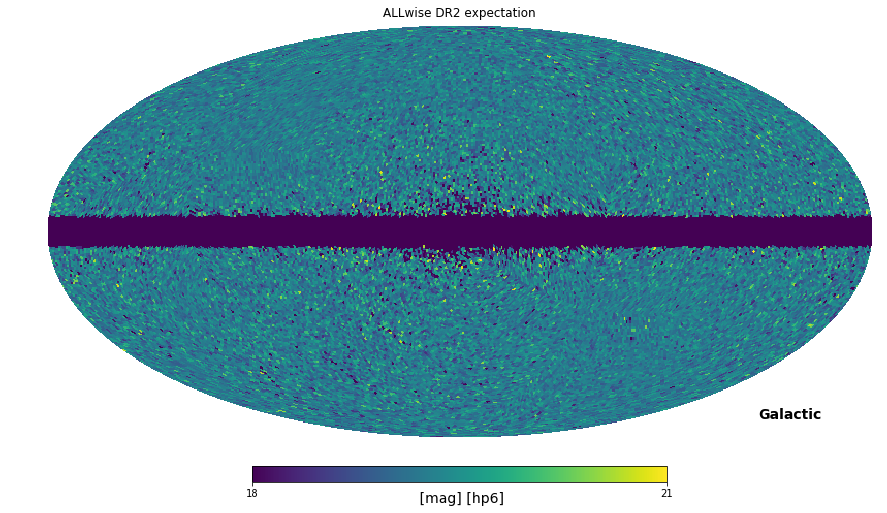

In [25]:
hpX = hp.gaiapix(level)
hpX.setHpValues(d,keyValue='phot_g_mean_mag')
f = plt.figure()
hpX.plot(f,vmin=18,vmax=21,cmap=mp.cm.viridis,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

In [26]:
d['hp'] = hpX.angle2pixel(d.RAJ2000,d.DEJ2000)

set the number of outliers using a poisson distribution to generate the number of condaminant around each qso

In [27]:
res = d[['RAJ2000','DEJ2000','WISEA','source_id']].copy()
res.columns = ['ra','dec','WISEA','qsoid']
res['hp'] = hpX.angle2pixel(res.ra,res.dec)
addGalactic(res)
res = res.join(m,on='hp',rsuffix='m')
res['n_outliers'] = np.random.poisson(res.n_outliers)

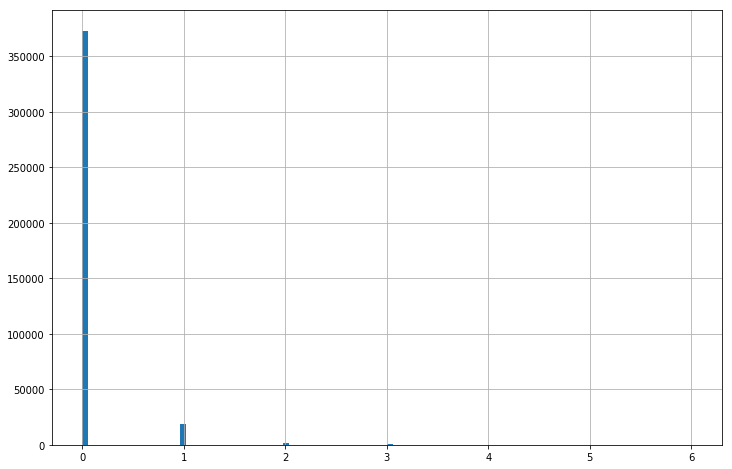

In [28]:
res.n_outliers.hist(bins=100)

In [29]:
res.groupby(res.n_outliers).hp.count()

n_outliers
0    373044
1     18824
2      1698
3       279
4        47
5        10
6         5
Name: hp, dtype: int64

healpix does not seems to work very well for integer... there should be no red dots 

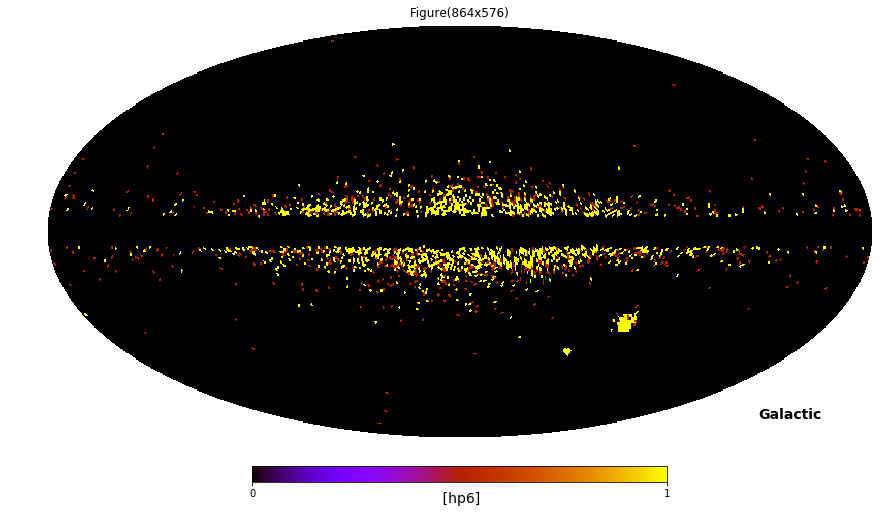

In [30]:
hpX = hp.gaiapix(level)
hpX.setHpValues(res,keyValue='n_outliers')
f = plt.figure()
hpX.plot(f,vmin=0,vmax=1,cmap=mp.cm.gnuplot,coord='G')

total number of outliers (ie stars and not QSO)

it seems too high by at least a factor 2

In [31]:
res.n_outliers.sum()

23325

In [32]:
res[res.n_outliers>0].n_outliers.sum()

23325

In [33]:
len(res)

393907

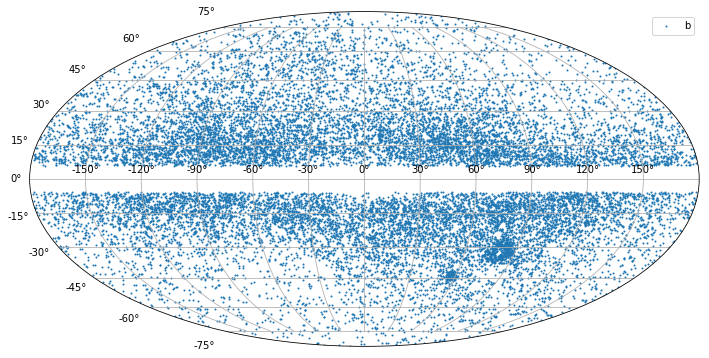

In [34]:
scale = u.deg.to(u.rad)
s = res[res.n_outliers==1]
plt.subplot(111,projection="mollweide")
plt.scatter(-s.l*scale,s.b*scale,s=1)
plt.grid()
plt.legend()

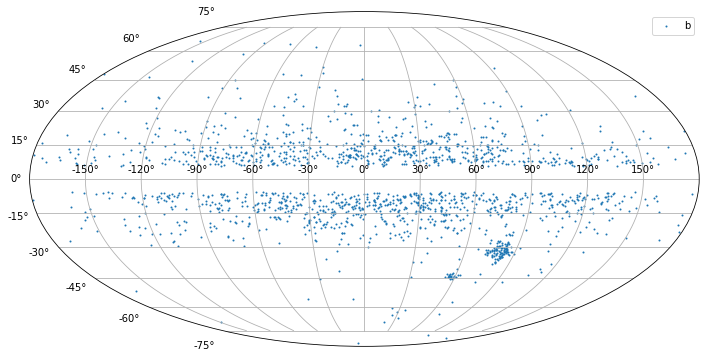

In [35]:
scale = u.deg.to(u.rad)
s = res[res.n_outliers==2]
plt.subplot(111,projection="mollweide")
plt.scatter(-s.l*scale,s.b*scale,s=1)
plt.grid()
plt.legend()

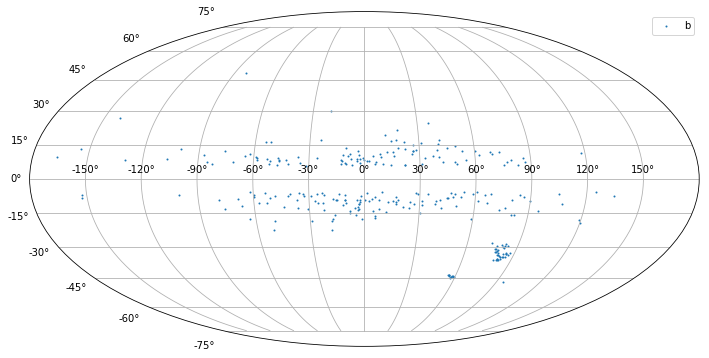

In [36]:
scale = u.deg.to(u.rad)
s = res[res.n_outliers==3]
plt.subplot(111,projection="mollweide")
plt.scatter(-s.l*scale,s.b*scale,s=1)
plt.grid()
plt.legend()

generate outliers

In [37]:
res[:10]

,ra,dec,WISEA,qsoid,hp,l,b,Unnamed: 0,density,hpm,prob,n_outliers
0,351.869774,-42.896768,b'J232728.74-425348.3',6535126442643030016,46434,-15.309427,-66.795535,46434,0.000001,46434,7.220562e-12,0
1,17.398767,-29.809275,b'J010935.70-294833.3',5029799572864499713,35738,-112.105746,-85.193370,35738,0.000002,35738,1.444112e-11,0
2,113.927892,8.898671,b'J073542.69+085355.2',3149175849421373442,22376,-150.089857,13.847541,22376,0.000019,22376,1.371907e-10,0
3,26.806939,9.903858,b'J014713.66+095413.8',2572555393054015491,18279,144.886835,-50.574387,18279,0.000001,18279,7.220562e-12,0
4,31.946926,-16.858857,b'J020747.26-165131.8',5144581336899518468,36554,-173.310893,-69.578698,36554,0.000000,36554,0.000000e+00,0
5,344.942376,-27.245608,b'J225946.17-271444.1',6609821627637039109,46965,26.187454,-65.219119,46965,0.000000,46965,0.000000e+00,0
6,213.049054,78.232924,b'J141211.77+781358.5',1714932234579869702,12185,117.802041,38.079012,12185,0.000005,12185,3.610281e-11,0
7,110.787114,77.492576,b'J072308.90+772933.2',1140018701295157255,8100,137.011331,28.147674,8100,0.000000,8100,0.000000e+00,0
8,62.788309,-55.634481,b'J041109.19-553804.1',4779454072438652936,33960,-94.274472,-44.410122,33960,0.000003,33960,2.166169e-11,0
9,190.819664,-42.085661,b'J124316.71-420508.3',6145902796743901193,43669,-58.686901,20.760439,43669,0.000009,43669,6.498506e-11,0


In [38]:
from astropy.coordinates import Longitude,Latitude

dispatch ra and dec uniformly arround the qso

In [39]:
outliers = res[res.n_outliers==1]
for k,g in res[res.n_outliers>1].groupby(res.n_outliers):
    outliers = outliers.append([g]*k,ignore_index=True)
outliers = outliers[['ra','dec','qsoid','hp']]
outliers['ra'] =  Longitude(
    np.random.uniform(low=outliers.ra-5*u.arcsec.to(u.deg),high=outliers.ra+5*u.arcsec.to(u.deg))*u.deg
    ).deg
outliers['dec'] =  Latitude(
    np.random.uniform(low=outliers.dec-5*u.arcsec.to(u.deg),high=outliers.dec+5*u.arcsec.to(u.deg))*u.deg
    ).deg

addGalactic(outliers)

check the size

In [40]:
len(outliers)-res.n_outliers.sum()

0

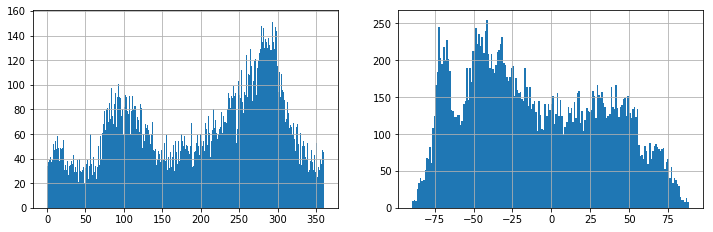

In [41]:
plt.subplot(221)
outliers.ra.hist(bins=360)
plt.subplot(222)
outliers.dec.hist(bins=180)

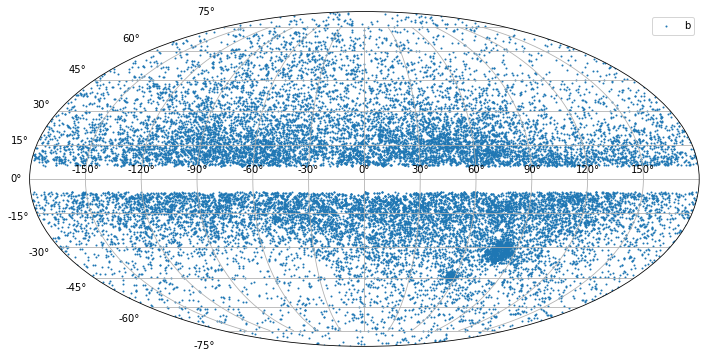

In [42]:
scale = u.deg.to(u.rad)
plt.subplot(111,projection="mollweide")
plt.scatter(-outliers.l*scale,outliers.b*scale,s=1)
plt.grid()
plt.legend()

In [43]:
outliers[:10]

,ra,dec,qsoid,hp,l,b
0,25.586228,8.049372,2571672141619527712,18272,144.041438,-52.723311
1,338.228386,68.334885,2225179434585948207,15810,110.673844,8.825063
2,319.496388,10.140104,1743933228151996483,12391,61.188327,-26.264716
3,62.303901,-37.680834,4845375979276730464,34428,-119.841839,-47.450319
4,317.136439,72.918958,2273608008346894439,16154,108.247114,16.776880
5,159.059910,-41.923654,5392070890231955567,38312,-82.343976,14.217626
6,305.611931,-45.919205,6669769853441671298,47391,-5.913533,-34.542189
7,95.654055,-42.687163,5568418914511093897,39565,-109.479914,-23.029762
8,188.733066,-52.248499,6078023724848644265,43186,-59.636425,10.540918
9,20.207835,30.492512,309472872080867510,2198,130.395354,-31.952911


build gaia model error from DR1 Vizier

In [44]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = 100000
%time r = Vizier.get_catalogs(['VI/137/gum_mw']).values()[0]
gum = r.to_pandas()

CPU times: user 5.76 s, sys: 66.2 ms, total: 5.82 s
Wall time: 5.84 s


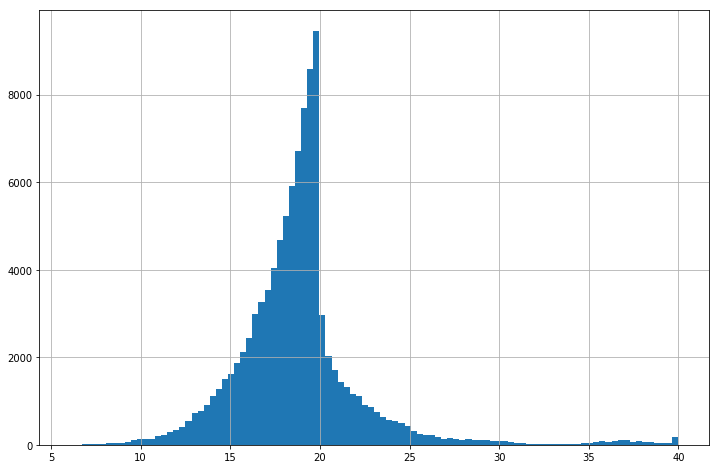

In [45]:
gum.Gmag.hist(bins=100)

In [46]:
def DR1error(g): 
    if g <= 15 :
        return 0.05 
    return 0.05*np.exp(0.2*(g-15)*(g-15))

DR1error = np.vectorize(DR1error)

def pm_error_DR2(g): 
    if g <= 15 :
        return 0.06
    return 0.06*np.exp(0.6*(g-15))

pm_error_DR2 = np.vectorize(pm_error_DR2)

def parallax_error_DR2(g): 
    if g <= 15 :
        return 0.04
    return 0.04*np.exp(0.5*(g-15)+0.01*(g-15)*(g-15))

parallax_error_DR2 = np.vectorize(parallax_error_DR2)

def randomFromData(data,n,range=(-1,1),bins=1000) : 
    """generate n random points following data distribution"""
    hist, bins = np.histogram(data, bins=bins,range=range)
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

In [47]:
d0 = gum[(gum.Gmag<21)& (gum.Gmag>3)]
outliers['phot_g_mean_mag'] = randomFromData(d0.Gmag,len(outliers),range=(3,21))
outliers['pmra'] = randomFromData(d0.pmRA,len(outliers),range=(-100,100))
outliers['pmdec'] = randomFromData(d0.pmDE,len(outliers),range=(-100,100))
outliers['ra_error'] = DR1error(outliers.phot_g_mean_mag)
outliers['dec_error'] = outliers['ra_error']
outliers['pmra_error'] = pm_error_DR2(outliers.phot_g_mean_mag)
outliers['pmdec_error'] = outliers['pmra_error']
outliers['parallax_error'] = parallax_error_DR2(outliers.phot_g_mean_mag)
outliers['astrometric_pseudo_colour'] = np.random.normal(1.6,0.2,len(outliers))

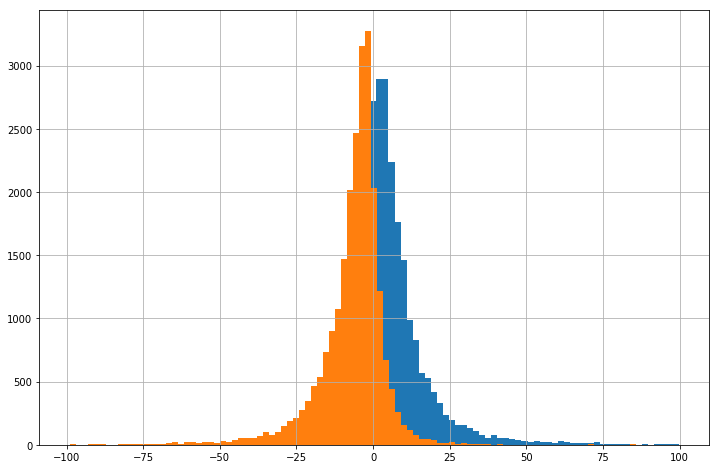

In [48]:
outliers.pmra.hist(bins=100)
outliers.pmdec.hist(bins=100)


I/337/tgas

In [49]:
Vizier.ROW_LIMIT = 100000
%time r = Vizier.get_catalogs(['I/337/tgas']).values()[0]
tgas = r.to_pandas()

CPU times: user 7.05 s, sys: 88.6 ms, total: 7.14 s
Wall time: 7.15 s


In [50]:
tgas.columns

Index(['HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS',
       'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_',
       'e__FG_', '__Gmag_', 'Var', '_RA.icrs', '_DE.icrs'],
      dtype='object')

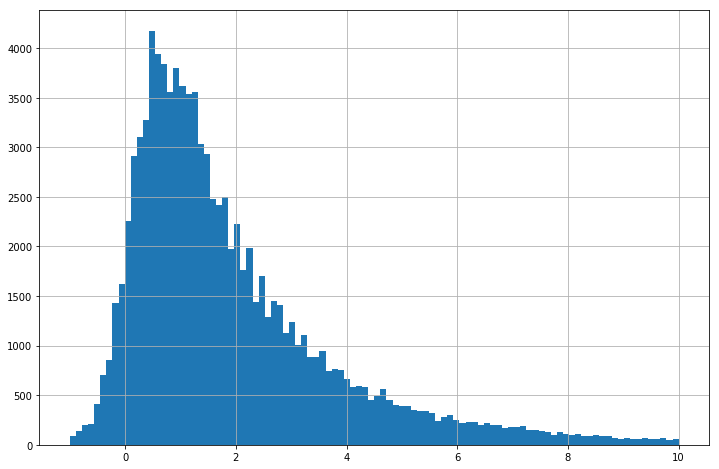

In [51]:
(tgas.Plx-0.5).hist(bins=100,range=(-1,10))

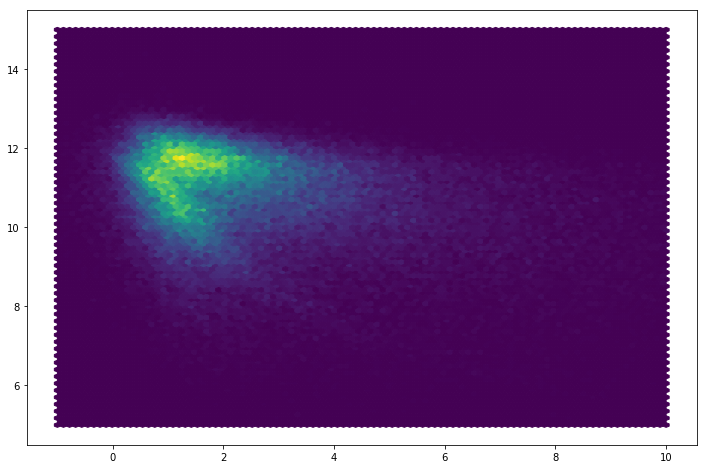

In [52]:
plt.hexbin(tgas.Plx,tgas['__Gmag_'],extent=(-1,10,5,15))

In [53]:
outliers['parallax'] = randomFromData(tgas.Plx,len(outliers),range=(-10,100))-2*outliers.parallax_error

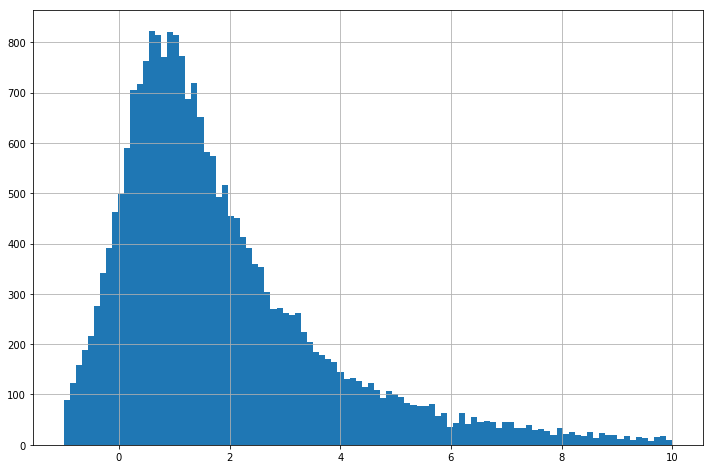

In [54]:
outliers.parallax.hist(bins=100,range=(-1,10))

In [55]:
outliers[:10]

,ra,dec,qsoid,hp,l,b,phot_g_mean_mag,pmra,pmdec,ra_error,dec_error,pmra_error,pmdec_error,parallax_error,astrometric_pseudo_colour,parallax
0,25.586228,8.049372,2571672141619527712,18272,144.041438,-52.723311,15.015,-0.7,-0.9,0.050002,0.050002,0.060542,0.060542,0.040301,1.409206,1.084398
1,338.228386,68.334885,2225179434585948207,15810,110.673844,8.825063,14.979,0.7,-46.3,0.050000,0.050000,0.060000,0.060000,0.040000,1.029345,3.615000
2,319.496388,10.140104,1743933228151996483,12391,61.188327,-26.264716,18.381,7.7,-1.1,0.491890,0.491890,0.456206,0.456206,0.243153,1.097327,1.998694
3,62.303901,-37.680834,4845375979276730464,34428,-119.841839,-47.450319,19.065,10.5,1.3,1.362216,1.362216,0.687694,0.687694,0.360186,1.523071,5.834627
4,317.136439,72.918958,2273608008346894439,16154,108.247114,16.776880,18.111,5.5,0.3,0.346432,0.346432,0.387976,0.387976,0.208755,1.443288,2.617489
5,159.059910,-41.923654,5392070890231955567,38312,-82.343976,14.217626,19.065,20.3,5.9,1.362216,1.362216,0.687694,0.687694,0.360186,1.630166,2.754627
6,305.611931,-45.919205,6669769853441671298,47391,-5.913533,-34.542189,20.307,8.7,-4.3,13.972869,13.972869,1.448878,1.448878,0.752967,1.442372,8.129065
7,95.654055,-42.687163,5568418914511093897,39565,-109.479914,-23.029762,15.015,8.1,-34.3,0.050002,0.050002,0.060542,0.060542,0.040301,1.518966,1.524398
8,188.733066,-52.248499,6078023724848644265,43186,-59.636425,10.540918,19.857,5.7,3.3,5.597710,5.597710,1.106044,1.106044,0.574376,1.427917,2.216248
9,20.207835,30.492512,309472872080867510,2198,130.395354,-31.952911,17.067,-6.1,11.1,0.117510,0.117510,0.207378,0.207378,0.117343,1.771536,1.480313


In [56]:
outliers['source_id'] = hpX.angle2pixel(outliers.ra,outliers.dec)*hpX.s + outliers.index

In [57]:
outliers['type'] = "STAR"

In [58]:
columns = ['ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'phot_g_mean_mag',
       'source_id', 'astrometric_pseudo_colour','qsoid','type']

# LQSO

In [63]:
randomLensedQSO = sierd.generateLQSO(100)

In [64]:
randomLensedQSO['ra'] = randomLensedQSO.ra*u.rad.to(u.deg)
randomLensedQSO['dec'] = randomLensedQSO.dec*u.rad.to(u.deg)
randomLensedQSO['ra_error'] = DR1error(randomLensedQSO.phot_g_mean_mag)
randomLensedQSO['dec_error'] = randomLensedQSO['ra_error']
randomLensedQSO['pmra_error'] = pm_error_DR2(randomLensedQSO.phot_g_mean_mag)
randomLensedQSO['pmdec_error'] = randomLensedQSO['pmra_error']
randomLensedQSO['parallax_error'] = parallax_error_DR2(randomLensedQSO.phot_g_mean_mag)
randomLensedQSO['parallax'] = np.random.normal(0,randomLensedQSO.parallax_error)
randomLensedQSO['type']='LQSO'
randomLensedQSO.index = randomLensedQSO.source_id

In [65]:
g = randomLensedQSO[randomLensedQSO.source_id==randomLensedQSO.qsoid].copy()
g[:10]

,ra,dec,pmra,pmdec,phot_g_mean_mag,source_id,qsoid,ra_error,dec_error,pmra_error,pmdec_error,parallax_error,parallax,type
source_id,,,,,,,,,,,,,,
4935401501999021510,20.963941,-44.687552,-0.052140,-0.277492,19.006710,4935401501999021510,4935401501999021510,1.239878,1.239878,0.664059,0.664059,0.348198,-0.157469,LQSO
3342977529042423856,89.530025,11.842575,0.096166,0.082293,17.545187,3342977529042423856,3342977529042423856,0.182658,0.182658,0.276292,0.276292,0.152361,-0.143051,LQSO
3550584713957813117,163.205180,-21.310830,-0.162371,0.355469,18.439945,3550584713957813117,3550584713957813117,0.533078,0.533078,0.472629,0.472629,0.251435,0.046163,LQSO
1673529866354407681,212.750146,68.285411,-0.314454,0.098197,17.586062,1673529866354407681,1673529866354407681,0.190484,0.190484,0.283151,0.283151,0.155833,-0.272634,LQSO
2290154634460172547,304.770728,75.897778,-0.114736,0.396491,17.740457,2290154634460172547,2290154634460172547,0.224538,0.224538,0.310635,0.310635,0.169730,-0.015052,LQSO
607644674639927745,138.332555,15.667563,0.221122,-0.137903,17.616339,607644674639927745,607644674639927745,0.196580,0.196580,0.288342,0.288342,0.158460,-0.470008,LQSO
5275024295781227017,117.463517,-66.549699,-0.114807,0.164364,17.111080,5275024295781227017,5275024295781227017,0.121919,0.121919,0.212936,0.212936,0.120179,-0.016525,LQSO
529031311726689988,0.158721,68.588809,0.232530,-0.012038,18.406655,529031311726689988,529031311726689988,0.509323,0.509323,0.463283,0.463283,0.246721,-0.519728,LQSO
6642121902962919393,294.972663,-53.862368,8.214265,20.164775,13.371049,6642121902962919393,6642121902962919393,0.050000,0.050000,0.060000,0.060000,0.040000,0.065883,LQSO


In [66]:
len(g)

100

In [67]:
g['astrometric_pseudo_colour'] = np.random.normal(1.6,0.2,len(g))

In [68]:
randomLensedQSO = randomLensedQSO.join(g['astrometric_pseudo_colour'],on='qsoid')

In [69]:
randomLensedQSO['astrometric_pseudo_colour'] = np.random.normal(randomLensedQSO.astrometric_pseudo_colour,0.05)

In [70]:
randomLensedQSO[columns][:10]

,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,source_id,astrometric_pseudo_colour,qsoid,type
source_id,,,,,,,,,,,,,,,
4935401510003770189,20.963523,917.640680,-44.687369,917.640680,2.892644,2.170878,0.050185,4.016239,-0.190408,4.016239,22.006261,4935401510003770189,1.573990,4935401501999021510,LQSO
4935401501999021510,20.963941,1.239878,-44.687552,1.239878,-0.157469,0.348198,-0.052140,0.664059,-0.277492,0.664059,19.006710,4935401501999021510,1.551721,4935401501999021510,LQSO
3342977547807430720,89.529926,145.931904,11.842037,145.931904,0.278373,1.402375,0.066205,2.654638,-0.025502,2.654638,21.316198,3342977547807430720,1.869102,3342977529042423856,LQSO
3342977529042423856,89.530025,0.182658,11.842575,0.182658,-0.143051,0.152361,0.096166,0.276292,0.082293,0.276292,17.545187,3342977529042423856,1.877766,3342977529042423856,LQSO
3550584713957813117,163.205180,0.533078,-21.310830,0.533078,0.046163,0.251435,-0.162371,0.472629,0.355469,0.472629,18.439945,3550584713957813117,1.589196,3550584713957813117,LQSO
3550584702837627262,163.204735,7.867135,-21.311714,7.867135,-0.617287,0.636742,0.056550,1.226379,-0.107949,1.226379,20.029128,3550584702837627262,1.606534,3550584713957813117,LQSO
1673529882541234377,212.750447,45.683916,68.286349,45.683916,-0.977819,1.042080,-0.218886,1.993026,0.135709,1.993026,20.838441,1673529882541234377,1.566463,1673529866354407681,LQSO
1673529866354407681,212.750146,0.190484,68.285411,0.190484,-0.272634,0.155833,-0.314454,0.283151,0.098197,0.283151,17.586062,1673529866354407681,1.456442,1673529866354407681,LQSO
2290154634460172547,304.770728,0.224538,75.897778,0.224538,-0.015052,0.169730,-0.114736,0.310635,0.396491,0.310635,17.740457,2290154634460172547,1.438318,2290154634460172547,LQSO


# Merge QSO, STAR, LQSO in one table

In [71]:
qso_outliers_lens = pd.concat([d[columns],outliers[columns],randomLensedQSO[columns]])

In [72]:
qso_outliers_lens.columns

Index(['ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'phot_g_mean_mag',
       'source_id', 'astrometric_pseudo_colour', 'qsoid', 'type'],
      dtype='object')

In [73]:
qso_outliers_lens.groupby(qso_outliers_lens.type).type.count()

type
LQSO       256
QSO     393907
STAR     23325
Name: type, dtype: int64

In [74]:
qso_outliers_lens.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417488 entries, 0 to 4584606591488214664
Columns: 15 entries, ra to type
dtypes: float64(12), int64(2), object(1)
memory usage: 51.0+ MB


Text(0.5,1,'ALLwise DR2 expectation')

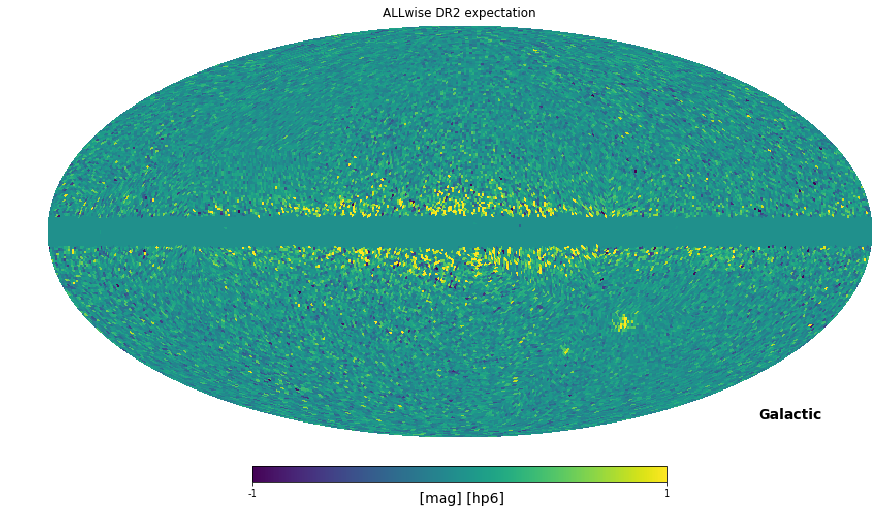

In [76]:
hpX = hp.gaiapix(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='parallax')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.viridis,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

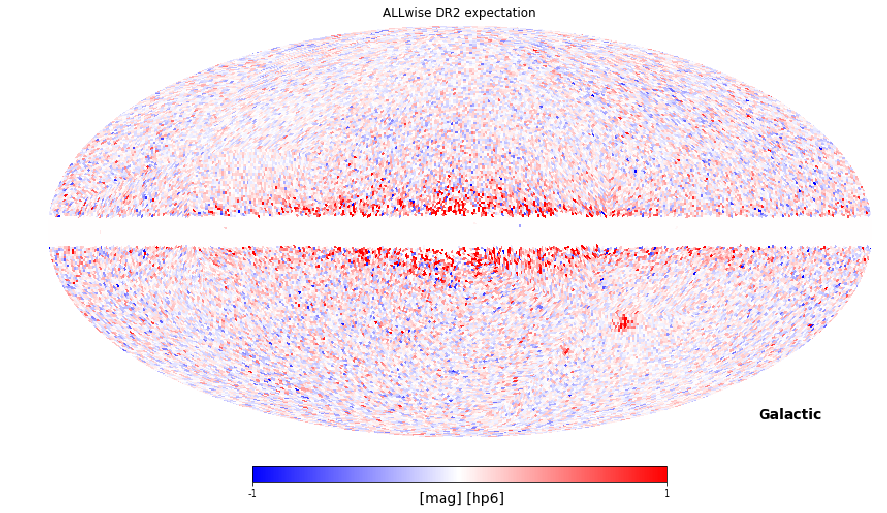

In [77]:
hpX = hp.gaiapix(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='parallax')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.bwr,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

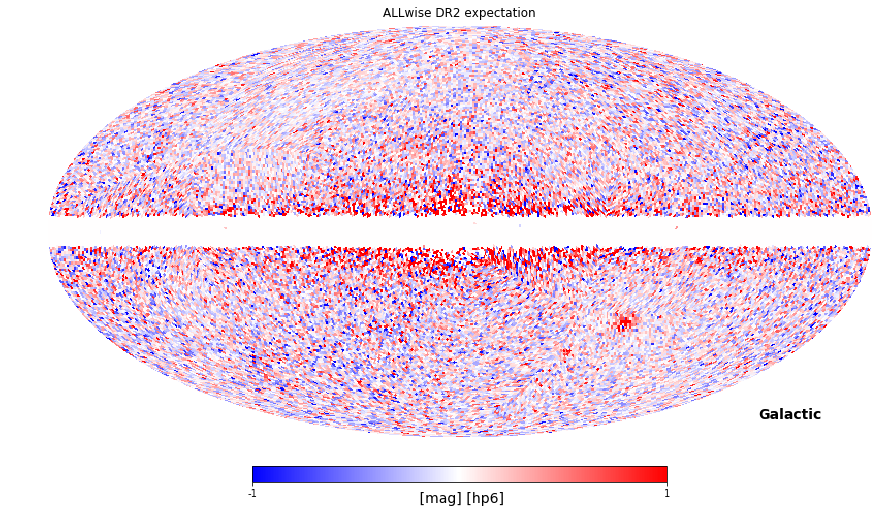

In [78]:
hpX = hp.gaiapix(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='pmra')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.bwr,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

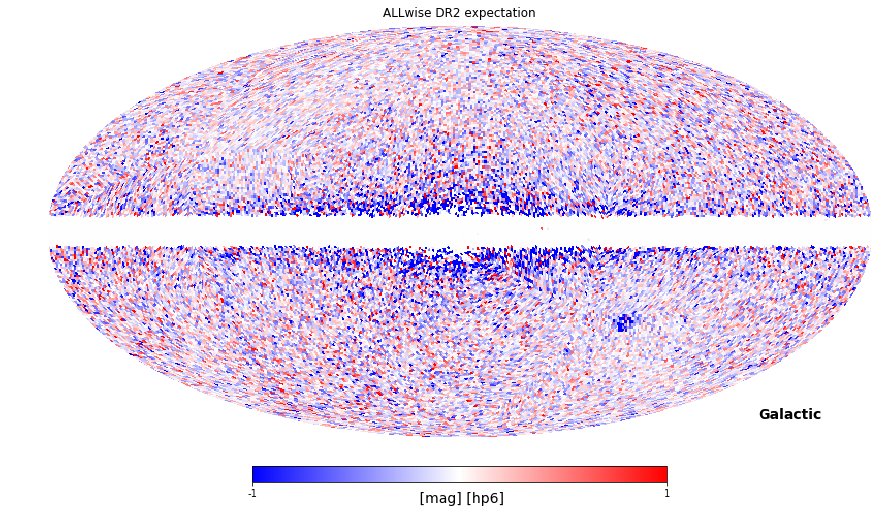

In [82]:
hpX = hpExpr(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='pmdec')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.bwr,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

In [79]:
qso_outliers_lens.to_csv("../data/simDataSet1.csv.gzip",compression='gzip')

In [80]:
ls -lh ../data/simDataSet1.csv.gzip

-rw-r--r--  1 abombrun  staff    38M Apr 24 12:15 ../data/simDataSet1.csv.gzip
